# EURECOM - SEMESTER PROJECT Spring 2017
## Title: Datasets for Machine Learning in the Kitchen
### Supervisor: Prof Maurizio Filippone
### Trung-Duy NGUYEN

## I/ Introduction

Cooking recipes provide an interesting yet challenging test-beb for Machine Learning algorithms. In particular, interesting insights that can be gained from the analysis of cooking recipes are, e.g., the impact of various combinations of ingredients on dietary indicators or the rating that users attribute to recipes. Challenges arise due to the variety of ways in which recipes can be represented in a database and in the complexity of representing sequences of actions involving ingredients and their quantities. Also, the large number of possible ingredientsin a recipe makes the representation in the large dimension, and this generally posessome problems with Machine Learning algorithms.

## II/ Objectives / Goals

The aim of this project is to design ways to represent recipes and apply some basic Machine Learning algorithms to solve some simple tasks such as classification of popular recipes. In particular, the project will identify web resources to access various recipes, will apply Natural Language Processing techniques to parse the recipes and create a database that will be processed using some basic Machine Learning techniques.

Due to the objectives of the project, the main tasks which need to be achieved are:
+ Crawl - collect recipes from web sources
+ Construct database schema for crawled data
+ Apply some basic Machine Learning algorithms (optional)

## III/ My work

### A/  Crawl - collect recipes links from web sources

   1. Data sources: In the scope of this project, Prof. Filippone and I decided to crawl recipes from the **FOOD.com** site
   2. Data source description: 
        + **FOOD.com** has nearly 20 million of users who access each month
        + has over 500,000 recipes to freely access with details and high rate of users interaction with 2 million Facebook likes. 
    
    **This extensive amount of data is sufficient and necessary to feed to Machine Learning algorithms.**

   3. Software, tools and libraries:
        + **Selenium** Webdriver: WebDriver is designed to provide a simpler, more concise programming interface in addition to addressing some limitations in the Selenium-RC API. Selenium-WebDriver was developed to better support dynamic web pages where elements of a page may change without the page itself being reloaded. WebDriver’s goal is to supply a well-designed object-oriented API that provides improved support for modern advanced web-app testing problems. **=> Create a virtual web browser on python environment to access target sites**
        + **BeautifulSoup**: is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. **=> Parsing HTML content from target sites and  Construct an Element tree from parsed data. It is also used for manipulate, extract and access HTML content**

In [2]:
from Crawl_link import *

def main_crawl_link():
    pre_link = 'http://www.food.com/services/mobile/fdc/search/sectionfront?pn='
    pos_link = '&searchTerm=&recordType=Recipe&sortBy=mostPopular&collectionId=17'
    link = []
    
    start_time = datetime.datetime.now()
    
    for i in range(1,12813):
        browser = webdriver.Chrome()
        browser.get(pre_link+str(i)+pos_link) 
        soup = BeautifulSoup(browser.page_source, 'html.parser')
        browser.close()
        browser.quit()
    
        clean_html = soup.select('span.text')
        record_url = []
        for k in range(0,len(clean_html)):
            record_url.append(clean_html[k].getText())
    
        link = link + [str(s) for s in record_url if "http://www.food.com/recipe/" in s]
        print('Done loop ' + str(i))
        if (datetime.datetime.now().minute-start_time.minute)%9 == 1 :
            time.sleep(120)
        else:
            time.sleep(rand.randint(1, 10))
    datalinks = open("recipe_list.txt", "w")
    for item in link:
        datalinks.writelines(item+'\n')
    datalinks.close()

#### Problem during this task:
1. The website is rendered by Javascript with __infinite scrolling__: At the beginning, my attempt is using Scrappy (which is also the scrapper framework, more popular than Selenium); unfortunately, this framework only allow to render the site once a time, which means the further content when we scroll the page is not visible to crawl. **Solution:** Instead of using Scrappy, I found that Selenium Webdriver has the ability to render interactive javascript page, which updates the HTML source when users interact with webpages
2. **Request timeout** when crawling the links of recipes: Very naive, my intuition is collecting the links one by one at the main index page; my approach went well until I realized that the time for a user to access the page is roughly 120 mins. After that, the connection to the page will be shutdown automatically. **Solution:** I tracked the package that sends data from server to the page and started collecting data on its address.

#### Results: Over 120,000 recipes links are collected

In [8]:
with open('recipe_list.txt', 'r') as f:
    line = f.read().split('\n')[0:10]
for x in line: print x

http://www.food.com/recipe/bourbon-chicken-45809
http://www.food.com/recipe/to-die-for-crock-pot-roast-27208
http://www.food.com/recipe/crock-pot-chicken-with-black-beans-cream-cheese-89204
http://www.food.com/recipe/creamy-cajun-chicken-pasta-39087
http://www.food.com/recipe/best-ever-banana-cake-with-cream-cheese-frosting-67256
http://www.food.com/recipe/yes-virginia-there-is-a-great-meatloaf-54257
http://www.food.com/recipe/quot-whatever-floats-your-boat-quot-brownies-32204
http://www.food.com/recipe/jo-mamas-world-famous-spaghetti-22782
http://www.food.com/recipe/oatmeal-raisin-cookies-35813
http://www.food.com/recipe/ice-cubes-420398


### B/  Crawl recipes information from collected links
1. Overview of the recipe structure:
![A sample of a recipe](./recipe_sample.png "Logo Title Text 1")

2. Which are attributes needed to collect?

    **10 attributes**
    + Recipe ID: int
    + Category: string
    + Link associated to a recipe: url encoded in string
    + Recipe name: string
    + Rate: float
    + Vote: int
    + Cook time: datetime
    + Number of people needs a recipe to be served: int
    + List of ingredients: List of strings
    + List of directions: List of strings
3. XML Schema represented as Tree structure:
    + recipe
       + --> recipe_ID
       + --> category
       + --> recipe_name
       + --> link
       + --> rate
       + --> vote
       + --> cook_time
       + --> serving
       + --> list_ingredient
           + --> ingredient
       + --> list_direction
           + --> direction
3. Methods:
    
    + Using lxml etree library to track the XPath of a HTML element then parsing it content to our self-built data schema
    + In this project, I would like to store data in the format of **XML**

In [39]:
from lxml import etree
root = etree.parse('./data/new_metric_output_0.xml')
print(etree.tostring(root.find('.//recipe'),pretty_print=True))

<recipe>
    <recipe_ID>26555</recipe_ID>
    <category>Candy</category>
    <link>http://www.food.com/recipe/best-buckeyes-peanut-butter-and-chocolate-candies-26555
</link>
    <recipe_name>Best Buckeyes (Peanut Butter and Chocolate Candies)</recipe_name>
    <rate>4.59</rate>
    <vote>32</vote>
    <cook_time>45mins</cook_time>
    <serving>1</serving>
    <list_ingredient>
      <ingredient>6.52 g jar creamy peanut butter</ingredient>
      <ingredient>2.36 ml  butter (softened) or 2.36 ml  margarine (softened)</ingredient>
      <ingredient>4.53 g  confectioners' sugar (about 3.5 cups)</ingredient>
      <ingredient>0.14 ml  vanilla</ingredient>
      <ingredient>4.25 g  chocolate chips (milk or semi-sweet)</ingredient>
      <ingredient>1.13-1.41 g  paraffin wax (I use 1/4 of a standard block)</ingredient>
      <ingredient>Tip</ingredient>
      <ingredient>0 to taste use 1/2 tsp of shortening per oz of chocolate instead paraffin wax</ingredient>
    </list_ingredient>
    <list

#### Problems during this task:
1. Tracking the Xpath of an html element: It is not easy to get use to with accessing an element in a xml file at first time, but ElementTree in lxml is a great tool which is used to manipulate xml documents, we can extract any element when we use the tool fluently.
2. **Time** which is the biggest problem when collecting data. On average, each recipe needs 8 seconds to be collected, and after 2 hours we need to pause the process for 30 minutes to avoiding IP get banned. Therefore, as a simple calculation, we cost over 350 hours (over 2 weeks) to crawl all 120,000 recipes

#### Result: Crawled 28,000 - 30,000 recipes
 

### C/  Text processing: Perform Natural Language Processing techniques to the data

1. Problem: 
    <center>"Given a sentence, with non-structural format, we need to extract which part stores the quantity and which is the name of an ingrdient "</center>
    
    **Example:** 
    + **"6.52 g jar creamy peanut"** has quantity = **6.52 g** and the name of ingredient = **creamy peanut**
    + More complex sentence **"2.36 ml  butter (softened) or 2.36 ml  margarine (softened)"**, we need to extract entity either **butter** or **magarine**

    **The more complexity of a sentence, the more sophisticated processing are needed ** 
2. Approaches: 

#### **a. Construct a dictionary of ingredients**

There is a project developing the AI chatbot in Kitchen which is also opensource. I take advantage of this project and reuse their ingredients data. There are over 4,000 ingredients in the dictionary

In [42]:
with open('ingredient_dict.txt', 'r') as f:
    line = f.read().split('\n')[0:10]
for x in line: print x

absinthe
achiote seeds
acini di pepe pasta
acorn squash
active yeast
adobo sauce from canned chipotle peppers to taste
adobo seasoning
adobo seasoning to taste
aerated milk chocolate candy bar
albacore tuna


#### **b. Split a sentence to N-grams**

To Extract the Name Entity of ingredients. I need to split a sentence to N-grams which N is the lenght of the given sentence. Then each gram will be compared with a vocabulary in the dictionary

In [48]:
from ParseXML import process_string
print(process_string('grated sharp cheddar cheese'))

[u'grated', u'sharp', u'cheddar', u'cheese', u'grated sharp', u'sharp cheddar', u'cheddar cheese', u'grated sharp cheddar', u'sharp cheddar cheese', u'grated sharp cheddar cheese']


#### **c. Tokenization and Lemmatization**

This step just simply token and lemmatize the text. In lemmatization step, I only lemmatize Nouns in a sentence.

In [50]:
from ParseXML import lemmatize_sentence
print(lemmatize_sentence('chickens'))
print(lemmatize_sentence('cheeses'))

chicken
cheese


#### d. Construct key-value pair of each sentence

After processing and filtering all text, this is the step that we parse string to get the key-value pair where **the key is the index of the keyword in the dictionary** and **value is the quantity of its ingredient**

In [57]:
from ParseXML import Parse_index,Parse_quantity,Get_key_value
# Load dictionary
ingredient_dict = np.load('ingredient_dict.npy').item()
Get_key_value('1 small  head of cabbage, cored and cut into wedges',ingredient_dict)

print(ingredient_dict.keys()[ingredient_dict.values().index(482)])

# More complex sentence
Get_key_value('77.11 g packagegrands homestyle refrigerated reduced-fat buttermilk biscuits, separated and cut into fourths'\
              ,ingredient_dict)
print(ingredient_dict.keys()[ingredient_dict.values().index(465)])

('key:', 482)
('value:', 1.0)
cabbage
('key:', 465)
('value:', 77.11)
buttermilk biscuit


#### e. Insert key-value to the sparse matrix
In the previous step, we extracted the key-value pair. Then, a recipe has multiple key-value pairs which will be input to the Matrix. Note: **the key is the column and value is the value at position [recipe_ID,key] of the matrix**


In [60]:
import pandas as pd

recipe_df = pd.DataFrame.from_csv('data/data0.csv')

recipe_df.head(5)


,absinthe,achiote seed,acinus di pepe pasta,acorn squash,active yeast,adobo sauce from canned chipotle pepper to taste,adobo seasoning,adobo seasoning to taste,aerated milk chocolate candy bar,albacore tuna,...,ziti pasta,zucchini,zucchini lengthwise,zucchini lengthwise then,zucchini or yellow summer squash,zucchini squash,zucchini steamed,zwieback cracker,zwieback toast,rate
26555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.59
30138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.90
50498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.84
52840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.68
64776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.80


In [61]:
recipe_df.describe()

,absinthe,achiote seed,acinus di pepe pasta,acorn squash,active yeast,adobo sauce from canned chipotle pepper to taste,adobo seasoning,adobo seasoning to taste,aerated milk chocolate candy bar,albacore tuna,...,ziti pasta,zucchini,zucchini lengthwise,zucchini lengthwise then,zucchini or yellow summer squash,zucchini squash,zucchini steamed,zwieback cracker,zwieback toast,rate
count,500.0,500.0,500.0,500.000000,500.0,500.0,500.000000,500.0,500.0,500.0,...,500.000000,500.000000,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.000000
mean,0.0,0.0,0.0,0.012000,0.0,0.0,0.000780,0.0,0.0,0.0,...,0.302760,0.579780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.697720
std,0.0,0.0,0.0,0.154609,0.0,0.0,0.017441,0.0,0.0,0.0,...,4.782257,7.761631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.214456
min,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.900000
25%,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.590000
50%,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.735000
75%,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.860000
max,0.0,0.0,0.0,2.000000,0.0,0.0,0.390000,0.0,0.0,0.0,...,75.690000,118.290000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000


#### Problem during this task:
1. The matching keyword problem: many current recipe parsers only have the one-to-one matching mechanism by given a fixed format of the sentence (e.g pyprika, ingredientparser ...). In this project, I built a function which can match a noun phrase to keywords in dictionary, the function is flexible with adapability to different kind of sentence formats.

### D/ Apply some basic Machine Learning algorithms (optional)

1. Description: I would like to perform some Machine Learning classification algorithms on the dataset such as:
    + Gaussian Naive Bayes
    + Multinomial Naive Bayes
    + Support Vector Machine (SVM)
    
    **Total dataset has 5500 reccords with 3927 columns. The training set and testing set account for 80% and 20% respectively**
2. Models performance: 

In [1]:
from Classification import load_data,run_models
import pandas as pd
import numpy as np

recipe_features,recipe_labels = load_data()

In [2]:
gaussNB,multiNB,svm= run_models(recipe_features,recipe_labels)

Iter: 0
Iter: 1
Iter: 2
Iter: 3
Iter: 4
Iter: 5
Iter: 6
Iter: 7
Iter: 8
Iter: 9


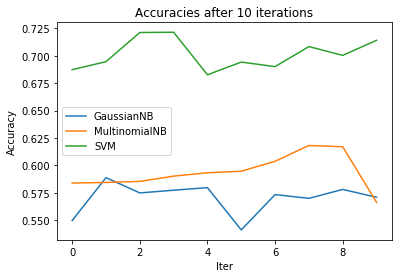

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(0,10),gaussNB, linestyle="-", label='GaussianNB')
plt.plot(range(0,10),multiNB, linestyle="-", label='MultinomialNB')
plt.plot(range(0,10),svm, linestyle="-", label='SVM')
plt.title('Accuracies after 10 iterations')
plt.ylabel('Accuracy')
plt.xlabel('Iter')
plt.legend()
plt.show()

In [3]:
print(gaussNB)
print(multiNB)
print(svm)

[0.54981549815498154, 0.58890845070422537, 0.57497612225405925, 0.57745187901008255, 0.5798016230838593, 0.5412757973733584, 0.57345971563981046, 0.57002676181980372, 0.57816836262719706, 0.57103574702108162]
[0.58394833948339486, 0.58450704225352113, 0.5854823304680038, 0.59028414298808429, 0.59332732191163207, 0.59474671669793622, 0.60379146919431281, 0.61819803746654778, 0.61702127659574468, 0.56645279560036665]
[0.6872693726937269, 0.69454225352112675, 0.72110792741165231, 0.72135655362053164, 0.68259693417493239, 0.69418386491557227, 0.69004739336492893, 0.70829616413916141, 0.70027752081406103, 0.71402383134738767]


#### Some further pre-processing techniques
+ Columns with zero mean are dropped
+ Perform PCA on pricipal components

In [7]:
from sklearn.decomposition import PCA
from Classification import run_models_pca

df = pd.DataFrame(recipe_features)
recipe_drop = df.loc[:, (df != 0).any(axis=0)]
print(recipe_drop.shape)

(5500, 1300)


In [7]:
 recipe_df = pd.DataFrame(np.c_[recipe_labels,recipe_features])
        
train_proportion = np.random.rand(len(recipe_df)) < 0.8
train = recipe_df[train_proportion]
test = recipe_df[~train_proportion]
        
#        X_train = train.as_matrix()[:,1:]
y_train = train.as_matrix()[:,0]
#        
#        X_test = test.as_matrix()[:,1:]
y_test = test.as_matrix()[:,0]
        
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(train.as_matrix()[:,1:])
X_test_pca = pca.transform(test.as_matrix()[:,1:])

print(X_train_pca.shape)

(4395L, 20L)


In [10]:
gaussNB,svm= run_models_pca(recipe_drop,recipe_labels,20)

Iter: 0
Iter: 1
Iter: 2
Iter: 3
Iter: 4
Iter: 5
Iter: 6
Iter: 7
Iter: 8
Iter: 9


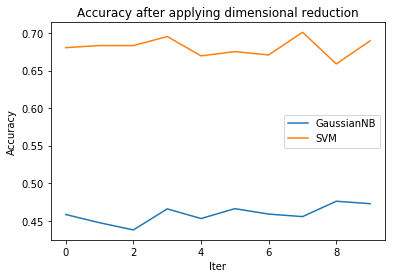

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(0,10),gaussNB, linestyle="-", label='GaussianNB')
plt.plot(range(0,10),svm, linestyle="-", label='SVM')
plt.title('Accuracy after applying dimensional reduction')
plt.ylabel('Accuracy')
plt.xlabel('Iter')
plt.legend()
plt.show()

In [11]:
print(gaussNB)
print(svm)

[0.45818505338078291, 0.44723183391003463, 0.43767060964513194, 0.46571682991985752, 0.45281306715063518, 0.46601073345259392, 0.45874886672710791, 0.45540796963946867, 0.47589285714285712, 0.47262773722627738]
[0.68060498220640564, 0.68339100346020765, 0.68334849863512281, 0.69545859305431879, 0.66969147005444651, 0.6753130590339893, 0.67089755213055302, 0.7011385199240987, 0.65892857142857142, 0.68978102189781021]


#### Reuse Bayes Classifier code in ASI acessed assignment

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(recipe_drop, recipe_labels, test_size=0.2, random_state = 42)
recipe_train = np.c_[y_train,X_train]
recipe_test = np.c_[y_test,X_test]
print(recipe_train.shape)

(4400L, 1301L)


In [15]:
from Bayes_classifier import separateByClass,summarize,summarizeByClass,getMean,getCovbyClass,getDetbyClass,getprior
from Bayes_classifier import Bayes_Classifier_fit,calculateClassProbabilities2,predict2,getPredictions,score
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
print('===== TRAINING =====')
summaries,cov_class,Mean,logdet, prior = Bayes_Classifier_fit(recipe_train)

print('===== PREDICTING =====')
predicting= getPredictions(summaries, cov_class, Mean, logdet,prior,recipe_test[:,1:])
acc = score(np.array(recipe_test[:,0]),predicting) 
print('Model Accuracy: '+ str(acc) +'%')


===== TRAINING =====
===== START TRAINING =====
Training time: 8.85899996758s
===== FINISH TRAINING =====
===== PREDICTING =====
('Done sample test: ', 0)


Bayes_classifier.py:124: RuntimeWarning: divide by zero encountered in log
  probabilities[classValue] = term1 + term2 + np.log(prior[classValue])


('Done sample test: ', 1000)
Model Accuracy: 42.6363636364%


Confusion matrix, without normalization


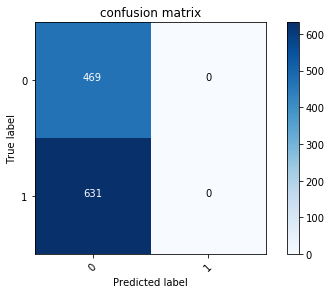

In [17]:
fig = plt.figure()
plot_confusion_matrix(confusion_matrix(recipe_test[:,0],predicting), classes= np.array(range(0,2)),\
                      title="confusion matrix")
plt.show()

## IV/ Limitations and Future work

**Limitations**
+ The time to collect one recipe is quite long (nearly 8 seconds on average)
+ Unable to parse the US metric (e.g ounce, tablespoon ...)
+ Some probabilistic algorithms have insignificant performance

**Future Work**
+ Instead of rendering completely the page then collecting a recipe, we should track the package transfering the content then crawling from the URL address of that package
+ Build more complex parser which could adapt to many measurements unit
+ There are the massive potential knowledge can be exploited from the data, namely, doing regression to predict which are popular ingredients or categories. 


## V/ Conclusion